In [9]:
#lets import in the libraries
import pandas as pd
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns; sns.set()
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols    
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [10]:
df_wash_school=pd.read_csv("WASH_school.csv",encoding="latin-1")

In [11]:
df_wash_school.head()

,Country,Year,School age population (thousands),urban,pre-primary,primary,secondary,NWA_Basic water service,NWA_Limited water service,NWA_No water service,...,RH_No hygiene service,PPH_Basic hygiene service,PPH_Limited hygiene service,PPH_No hygiene service,PH_Basic hygiene service,PH_Limited hygiene service,PH_No hygiene service,SH_Basic hygiene service,SH_Limited hygiene service,SH_No hygiene service
0,Afghanistan,2016,13299.24707,27.13200188,15.83112907,45.34436417,38.82450485,-,70,30,...,-,-,-,-,-,-,-,-,-,-
1,Algeria,2016,8512.623047,71.30400085,10.01031017,42.57013321,47.41955566,93.30671292,0,6.693287078,...,-,-,-,-,97.78,-,-,99.3,-,-
2,Andorra,2016,-,-,-,-,-,100,0,0,...,-,-,-,-,100,0,0,100,0,0
3,Angola,2014,9412.754883,43.27400589,9.717367172,50.81467819,39.46795654,-,51,49,...,-,-,-,-,-,-,-,-,-,-
4,Argentina,2016,10821.82813,91.89299774,20.48494911,40.30799484,39.20705414,-,89.9,10.1,...,-,-,-,-,-,-,-,-,-,-


In [12]:
df_wash_school.columns

Index(['Country', 'Year', 'School age population (thousands)', 'urban',
       'pre-primary', 'primary', 'secondary', 'NWA_Basic water service',
       'NWA_Limited water service', 'NWA_No water service',
       'UWA_Basic water service', 'UWA_Limited water service',
       'UWA_No water service', 'RWA_Basic water service ',
       'RWA_Limited water service ', 'RWA_No water service ',
       'PPWA_Basic water service ', 'PPWA_Limited water service ',
       'PPWA_No water service ', 'PWA_Basic water service',
       'PWA_Limited water service ', 'PWA_No water service ',
       'SWA_Basic water service ', 'SWA_Limited water service ',
       'SWA_No water service', 'NS_Basic sanitation service',
       'NS_Limited sanitation service', 'NS_No sanitation service ',
       'US_Basic sanitation service', 'US_Limited sanitation service',
       'US_No sanitation service ', 'RS_Basic sanitation service',
       'RS_Limited sanitation service', 'RS_No sanitation service ',
       'PPS_Basic s

In [13]:
Litracy_rates=pd.read_csv("Litracy_rates.csv",encoding="latin-1")

In [14]:
Litracy_rates.head()

,EDULIT_IND,Indicator,Country,TIME,Value
0,LR_AG15T24_GPI,"Youth literacy rate, population 15-24 years, g...",Morocco,2018,0.99347
1,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",Latin America and the Caribbean,2013,97.69499
2,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",Latin America and the Caribbean,2014,98.03670
3,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",Latin America and the Caribbean,2015,98.10980
4,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",Latin America and the Caribbean,2016,98.22810


In [15]:
df_wash_school.iloc[:,60]

0                -
1                -
2                0
3                -
4                -
5                0
6                0
7                0
8      2.645502646
9                0
10               0
11               0
12               -
13               -
14     13.10679612
15               -
16               -
17         2.07082
18               -
19               -
20               -
21            57.8
22               -
23               -
24               -
25               -
26               -
27               0
28               0
29               -
          ...     
122              0
123              -
124              -
125              0
126              -
127              0
128              0
129              0
130              -
131              -
132              -
133              -
134              0
135              -
136              -
137              0
138              -
139              -
140              -
141              -
142              -
143         

In [16]:
for i in range(0,152):
    for j in [7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58]:
        if df_wash_school.iloc[i,j]!="-" and df_wash_school.iloc[i,j+1]!="-":
            if round(float(df_wash_school.iloc[i,j]),0)+round(float(df_wash_school.iloc[i,j+1]),0)==100:
                df_wash_school.iloc[i,j+2]=0
        if df_wash_school.iloc[i,j]!="-" and df_wash_school.iloc[i,j+2]!="-":
            if round(float(df_wash_school.iloc[i,j]),0)+round(float(df_wash_school.iloc[i,j+2]),0)==100:
                df_wash_school.iloc[i,j+1]=0
        if df_wash_school.iloc[i,j+2]!="-" and df_wash_school.iloc[i,j+1]!="-":
            if round(float(df_wash_school.iloc[i,j+2]),0)+round(float(df_wash_school.iloc[i,j+1]),0)==100:
                df_wash_school.iloc[i,j]=0    
            
                        
    

In [17]:
df_wash_school.to_csv("df_wash_school_imputed_last.csv")

PermissionError: [Errno 13] Permission denied: 'df_wash_school_imputed_last.csv'

In [ ]:
df_wash_school_imputed=pd.read_csv("df_wash_school_imputed_last.csv",encoding="latin-1")

In [18]:
is_2016 =  df_wash_school_imputed['Year']==2016

NameError: name 'df_wash_school_imputed' is not defined

In [19]:
wash_school_2016=df_wash_school_imputed[is_2016]

NameError: name 'df_wash_school_imputed' is not defined

In [20]:
Litracy_rate_2016=Litracy_rates[is_2016_2]

NameError: name 'is_2016_2' is not defined

In [21]:
is_2016=

SyntaxError: invalid syntax (<ipython-input-21-a725523df9c6>, line 1)

In [22]:
is_adult_both_sexes=Litracy_rate_2016["Indicator"]=="Adult literacy rate, population 15+ years, both sexes (%)"

NameError: name 'Litracy_rate_2016' is not defined

In [23]:
Litracy_rate_2016_adult=Litracy_rate_2016[is_adult_both_sexes]

NameError: name 'Litracy_rate_2016' is not defined

In [24]:
Litracy_rate_2016_adult.head()

NameError: name 'Litracy_rate_2016_adult' is not defined

In [25]:
is_20166=Litracy_rate_2016['TIME']==2016

NameError: name 'Litracy_rate_2016' is not defined

In [26]:
new_litracy=Litracy_rate_2016[is_20166]

NameError: name 'Litracy_rate_2016' is not defined

In [27]:
merged_data_2=pd.merge(wash_school_2016,new_litracy,on="Country",how="left")

NameError: name 'wash_school_2016' is not defined

In [28]:
new_litracy=Litracy_rate_2016[is_20166]

NameError: name 'Litracy_rate_2016' is not defined

In [29]:
merged_data=pd.merge(wash_school_2016,Litracy_rate_2016_adult,left_on="Country",right_on="Country",how="left")

NameError: name 'wash_school_2016' is not defined

In [30]:
merged_data.to_csv("final_Education_2.csv")

NameError: name 'merged_data' is not defined

In [31]:
new_litracy['Country']

NameError: name 'new_litracy' is not defined

In [32]:
merged_data_3=merged_data.drop_duplicates(subset ="Country",keep='first',) 

NameError: name 'merged_data' is not defined

In [33]:
merged_data_3.to_csv("merged_data_3.csv")

NameError: name 'merged_data_3' is not defined

In [34]:
merged_data.to_csv("merged_school_wash.csv")

NameError: name 'merged_data' is not defined

In [35]:
dd=pd.read_csv("merged_data_4.csv",encoding="latin-1")

In [36]:
dd.head()

,Unnamed: 0,Country_full,Country,Year,School age population (thousands),urban,pre-primary,primary,secondary,NWA_Basic water service,...,PH_Basic hygiene service,PH_Limited hygiene service,PH_No hygiene service,SH_Basic hygiene service,SH_Limited hygiene service,SH_No hygiene service,EDULIT_IND,Indicator,TIME,Value
0,0,Afghanistan,Afgh,2016,13299.24707,27.13200188,15.83112907,45.34436417,38.82450485,0,...,-,-,-,-,-,-,NaN,NaN,NaN,NaN
1,1,Algeria,Alge,2016,8512.623047,71.30400085,10.01031017,42.57013321,47.41955566,93.30671292,...,97.78,-,-,99.3,-,-,NaN,NaN,NaN,NaN
2,2,Andorra,Ando,2016,-,-,-,-,-,100,...,100,0,0,100,0,0,NaN,NaN,NaN,NaN
3,3,Argentina,Arge,2016,10821.82813,91.89299774,20.48494911,40.30799484,39.20705414,0,...,-,-,-,-,-,-,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",2013.0,99.12195
4,7,Australia,Aust,2016,4197.949219,89.55399323,7.541897297,51.23599625,41.22210693,100,...,100,0,0,100,0,0,NaN,NaN,NaN,NaN


In [37]:
dd=pd.read_csv("merged_data_3.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc2 in position 3: unexpected end of data

In [38]:
asia = ['Afghanistan', 'Bahrain', 'United Arab Emirates','Saudi Arabia', 'Kuwait', 'Qatar', 'Oman',
    'Sultanate of Oman','Lebanon', 'Iraq', 'Yemen', 'Pakistan', 'Lebanon', 'Philippines', 'Jordan']
europe = ['Germany','Spain', 'France', 'Italy', 'Netherlands', 'Norway', 'Sweden','Czech Republic', 'Finland',
      'Denmark', 'Czech Republic', 'Switzerland', 'UK', 'UK&I', 'Poland', 'Greece','Austria',
      'Bulgaria', 'Hungary', 'Luxembourg', 'Romania' , 'Slovakia', 'Estonia', 'Slovenia','Portugal',
      'Croatia', 'Lithuania', 'Latvia','Serbia', 'Estonia', 'ME', 'Iceland' ]
africa = ['Morocco', 'Tunisia', 'Africa', 'ZA', 'Kenya']
other = ['USA', 'Australia', 'Reunion', 'Faroe Islands']



In [39]:
def GetConti(counry):
    if counry in asia:
        return "Asia"
    elif counry in europe:
        return "Europe"
    elif counry in africa:
        return "Africa"
    else:
        return "other"

In [40]:
dd['Continent'] = dd['Country'].apply(lambda x: GetConti(x)

SyntaxError: unexpected EOF while parsing (<ipython-input-40-c033fa60c73c>, line 1)

In [41]:
dd.columns

Index(['Unnamed: 0', 'Country_full', 'Country', 'Year',
       'School age population (thousands)', 'urban', 'pre-primary', 'primary',
       'secondary', 'NWA_Basic water service', 'NWA_Limited water service',
       'NWA_No water service', 'UWA_Basic water service',
       'UWA_Limited water service', 'UWA_No water service',
       'RWA_Basic water service ', 'RWA_Limited water service ',
       'RWA_No water service ', 'PPWA_Basic water service ',
       'PPWA_Limited water service ', 'PPWA_No water service ',
       'PWA_Basic water service', 'PWA_Limited water service ',
       'PWA_No water service ', 'SWA_Basic water service ',
       'SWA_Limited water service ', 'SWA_No water service',
       'NS_Basic sanitation service', 'NS_Limited sanitation service',
       'NS_No sanitation service ', 'US_Basic sanitation service',
       'US_Limited sanitation service', 'US_No sanitation service ',
       'RS_Basic sanitation service', 'RS_Limited sanitation service',
       'RS_No sani

In [42]:
BWS=dd['NWA_Basic water service']

In [43]:
nn=pd.DataFrame(BWS,columns=['NWA_Basic water service'])

In [44]:
nn['Value']=dd['Value']

In [45]:
nn['Country']=dd['Country']

In [46]:
nn_new=nn.dropna()

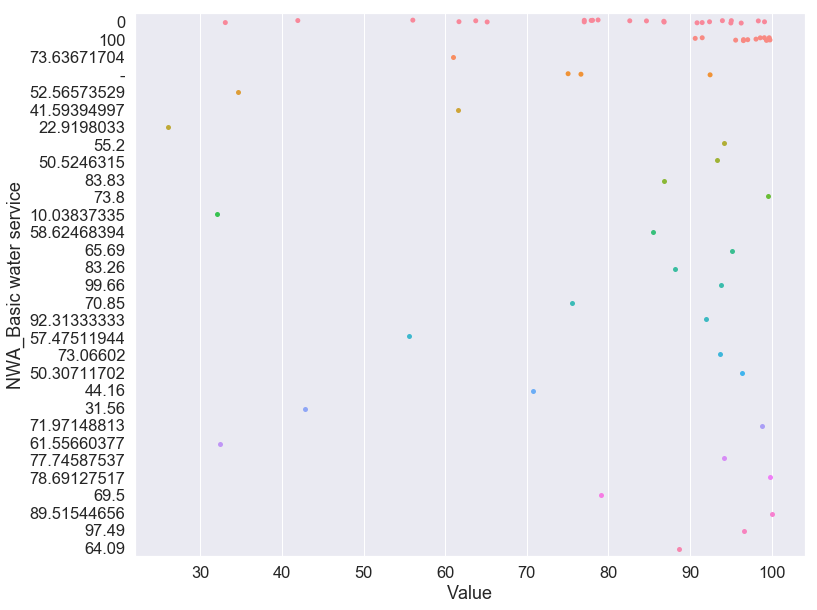

In [47]:
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 1.5)
sns.stripplot(x="Value", y="NWA_Basic water service", data=nn_new)

In [48]:
nn_new

,NWA_Basic water service,Value,Country
3,0,99.12195,Arge
5,100,99.78936,Azer
6,100,97.06668,Bahr
7,73.63671704,61.01554,Bang
8,100,99.60000,Barb
13,-,92.45508,Boli
14,0,86.82318,Bots
15,0,91.48424,Braz
16,52.56573529,34.59940,Burk
17,41.59394997,61.56973,Buru


In [49]:
nn_new=nn_new.replace("-",np.nan)

In [50]:
nn_new=nn_new.dropna()

In [51]:
nn_new["NWA_Basic water service"]=nn_new["NWA_Basic water service"].astype(float)

In [52]:
is_above_0=nn_new["NWA_Basic water service"]>0

In [53]:
nn_new=nn_new[is_above_0]

In [54]:
nn_new=nn_new.reset_index(drop=True)

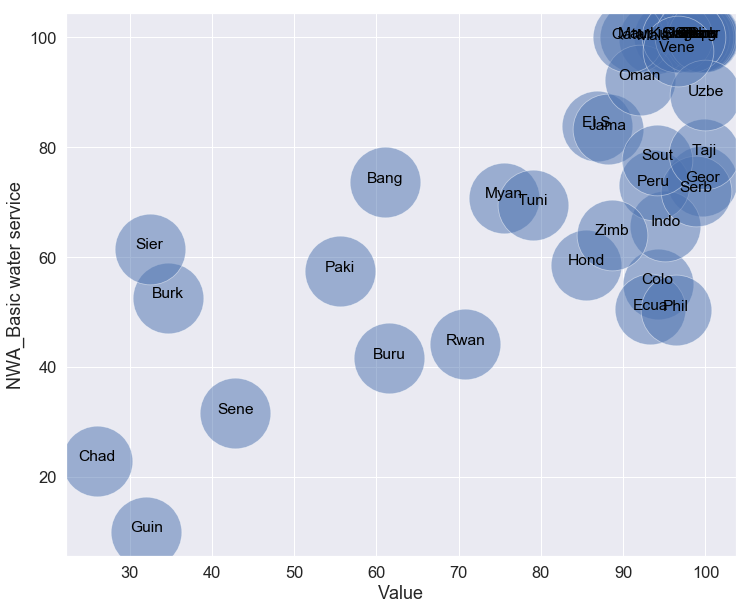

In [55]:
# Load libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(x="Value", y="NWA_Basic water service",s=5000, data=nn_new, alpha = 0.5)
sns.set(font_scale = 1.3)

# ax.set_xlim(0,6)
# ax.set_ylim(-2, 18)

#For each point, we add a text inside the bubble
for line in range(0,nn_new.shape[0]):
     ax.text(nn_new["Value"][line], nn_new["NWA_Basic water service"][line], nn_new["Country"][line], horizontalalignment='center', size='medium', color='black')

In [56]:
nn_new["Value"][1]

97.06668

In [57]:
nn_new["Country"][5]

'Buru'

In [58]:
#Clustering

In [59]:
'NWA_Basic water service','NH_Basic hygiene service' 'NS_Basic sanitation service' 'Value'

('NWA_Basic water service',
 'NH_Basic hygiene serviceNS_Basic sanitation serviceValue')

In [60]:
wash=dd["NWA_Basic water service"]

In [61]:
wash=pd.DataFrame(dd["NWA_Basic water service"],columns=["NWA_Basic water service"])

In [62]:
wash['Hygine']=dd["NH_Basic hygiene service"]

In [204]:
wash['Sanitation']=dd["NS_Basic sanitation service"]
wash['Country']=dd["Country"]
wash


,NWA_Basic water service,Hygine,Sanitation,Cluster,cluster,Country,Literacy
0,93.306713,98.580000,-,1,1,Afgh,NaN
1,100.000000,100.000000,98.95,1,1,Alge,NaN
2,100.000000,100.000000,100,1,1,Ando,NaN
3,100.000000,100.000000,77,1,1,Arge,99.12195
4,100.000000,100.000000,100,1,1,Aust,NaN
5,73.636717,44.000000,100,0,0,Azer,99.78936
6,100.000000,100.000000,100,1,1,Bahr,97.06668
7,100.000000,100.000000,58.55357143,1,1,Bang,61.01554
8,59.442458,0.000000,100,0,0,Barb,99.60000
9,0.000000,61.021420,100,2,2,Bela,NaN


In [215]:
wash=wash.drop(["Literacy"],1)
wash


,NWA_Basic water service,Hygine,Sanitation,Cluster,cluster,Country
0,93.306713,98.580000,-,1,1,Afgh
1,100.000000,100.000000,98.95,1,1,Alge
2,100.000000,100.000000,100,1,1,Ando
3,100.000000,100.000000,77,1,1,Arge
4,100.000000,100.000000,100,1,1,Aust
5,73.636717,44.000000,100,0,0,Azer
6,100.000000,100.000000,100,1,1,Bahr
7,100.000000,100.000000,58.55357143,1,1,Bang
8,59.442458,0.000000,100,0,0,Barb
9,0.000000,61.021420,100,2,2,Bela


In [216]:

wash2=wash
wash2['Literacy']=dd["Value"]

wash=wash.drop(["Literacy"],1)
wash

,NWA_Basic water service,Hygine,Sanitation,Cluster,cluster,Country
0,93.306713,98.580000,-,1,1,Afgh
1,100.000000,100.000000,98.95,1,1,Alge
2,100.000000,100.000000,100,1,1,Ando
3,100.000000,100.000000,77,1,1,Arge
4,100.000000,100.000000,100,1,1,Aust
5,73.636717,44.000000,100,0,0,Azer
6,100.000000,100.000000,100,1,1,Bahr
7,100.000000,100.000000,58.55357143,1,1,Bang
8,59.442458,0.000000,100,0,0,Barb
9,0.000000,61.021420,100,2,2,Bela


In [217]:
wash2

,NWA_Basic water service,Hygine,Sanitation,Cluster,cluster,Country,Literacy
0,93.306713,98.580000,-,1,1,Afgh,NaN
1,100.000000,100.000000,98.95,1,1,Alge,NaN
2,100.000000,100.000000,100,1,1,Ando,NaN
3,100.000000,100.000000,77,1,1,Arge,99.12195
4,100.000000,100.000000,100,1,1,Aust,NaN
5,73.636717,44.000000,100,0,0,Azer,99.78936
6,100.000000,100.000000,100,1,1,Bahr,97.06668
7,100.000000,100.000000,58.55357143,1,1,Bang,61.01554
8,59.442458,0.000000,100,0,0,Barb,99.60000
9,0.000000,61.021420,100,2,2,Bela,NaN


In [99]:
#wash['Country']=dd["Country_full"]
#wash['Value']=dd["Value"]

In [100]:
wash.head()

,NWA_Basic water service,Hygine,Sanitation,Cluster,cluster,Country
1,93.306713,98.58,98.95,1,1,Alge
2,100.000000,100.00,100,1,1,Ando
4,100.000000,100.00,100,1,1,Aust
5,100.000000,100.00,100,1,1,Azer
6,100.000000,100.00,100,1,1,Bahr


In [101]:
wash=wash.replace("-",np.nan)

In [102]:
wash=wash.dropna()

In [103]:
wash

,NWA_Basic water service,Hygine,Sanitation,Cluster,cluster,Country
1,93.306713,98.580000,98.95,1,1,Alge
2,100.000000,100.000000,100,1,1,Ando
4,100.000000,100.000000,100,1,1,Aust
5,100.000000,100.000000,100,1,1,Azer
6,100.000000,100.000000,100,1,1,Bahr
7,73.636717,44.000000,58.55357143,0,0,Bang
8,100.000000,100.000000,100,1,1,Barb
9,100.000000,100.000000,100,1,1,Bela
12,59.442458,0.000000,76.06562215,0,0,Bhut
15,0.000000,61.021420,83.90410959,2,2,Braz


ValueError: could not convert string to float: 'Zimb'

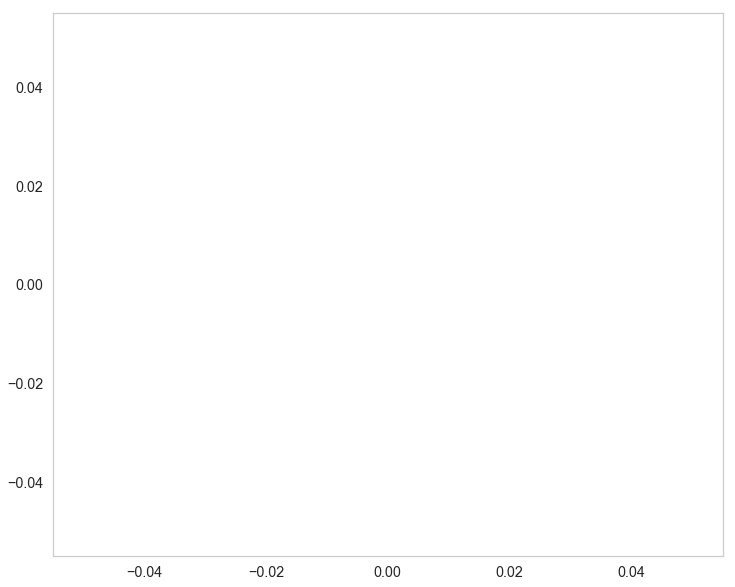

In [104]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

# plt.plot()
# plt.xlim([0, 10])
# plt.ylim([0, 10])
# plt.title('Dataset')
# plt.scatter(x1, x2)
# plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(wash)
    kmeanModel.fit(wash)
    distortions.append(sum(np.min(cdist(wash, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / wash.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [105]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# X, _ = make_blobs(n_samples=10, centers=3, n_features=4)

# df = pd.DataFrame(X, columns=['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4'])

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(wash)

wash['Cluster'] = y

print(wash.head())

ValueError: could not convert string to float: 'Zimb'

In [106]:
wash

,NWA_Basic water service,Hygine,Sanitation,Cluster,cluster,Country
1,93.306713,98.580000,98.95,1,1,Alge
2,100.000000,100.000000,100,1,1,Ando
4,100.000000,100.000000,100,1,1,Aust
5,100.000000,100.000000,100,1,1,Azer
6,100.000000,100.000000,100,1,1,Bahr
7,73.636717,44.000000,58.55357143,0,0,Bang
8,100.000000,100.000000,100,1,1,Barb
9,100.000000,100.000000,100,1,1,Bela
12,59.442458,0.000000,76.06562215,0,0,Bhut
15,0.000000,61.021420,83.90410959,2,2,Braz


In [107]:
wash['NWA_Basic water service'] = pd.to_numeric(wash['NWA_Basic water service'], errors='coerce')
wash['Hygine'] = pd.to_numeric(wash['Hygine'], errors='coerce')
wash['Sanitation'] = pd.to_numeric(wash['Sanitation'], errors='coerce')
wash['cluster'] = pd.to_numeric(wash['Cluster'], errors='coerce')                                                   

In [108]:
sns.set_palette("Set1", 8, .75)

In [166]:
colorsdefined = ["#FF0B04", "#4374B3", '#2aff04']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

In [142]:
wash=wash.reset_index(drop=True)

In [161]:
wash

,NWA_Basic water service,Hygine,Sanitation,Cluster,cluster,Country
0,93.306713,98.580000,98.950000,1,1,Alge
1,100.000000,100.000000,100.000000,1,1,Ando
2,100.000000,100.000000,100.000000,1,1,Aust
3,100.000000,100.000000,100.000000,1,1,Azer
4,100.000000,100.000000,100.000000,1,1,Bahr
5,73.636717,44.000000,58.553571,0,0,Bang
6,100.000000,100.000000,100.000000,1,1,Barb
7,100.000000,100.000000,100.000000,1,1,Bela
8,59.442458,0.000000,76.065622,0,0,Bhut
9,0.000000,61.021420,83.904110,2,2,Braz


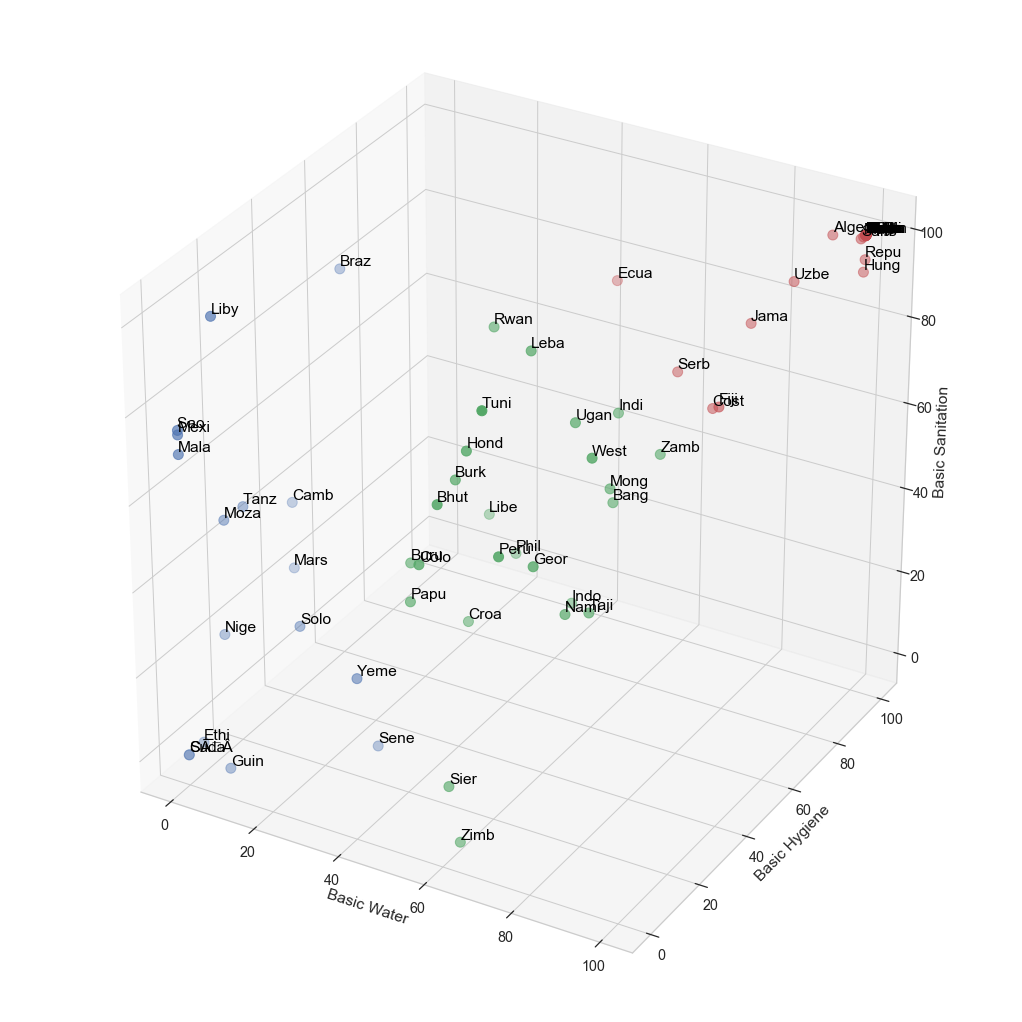

In [192]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(14,14))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

# x = np.random.uniform(1,20,size=20)
# y = np.random.uniform(1,100,size=20)
# z = np.random.uniform(1,100,size=20)
sns.set_palette(sns.color_palette(colorsdefined))

col=np.zeros(wash.shape[0])
col=col.astype(str)
for i in range(0,wash.shape[0]):
    if wash.Cluster[i]==0:
        col[i]="g"
    if wash.Cluster[i]==1:
        col[i]="r"
    if wash.Cluster[i]==2:
        col[i]="b"
    
        

for line in range(0,wash.shape[0]):
    ax.text3D(x=wash["NWA_Basic water service"][line], 
               y=wash["Hygine"][line], 
               z=wash["Sanitation"][line], 
               text=wash["Country"][line], s='large',
               horizontalalignment='left', va='bottom',  color='black')

ax.scatter(xs=wash['NWA_Basic water service'],ys= wash['Hygine'], zs=wash['Sanitation'],s=100,c=col)
ax.set_xlabel('Basic Water')
ax.set_ylabel('Basic Hygiene')
ax.set_zlabel('Basic Sanitation')

plt.show()

In [220]:
wash2
wash2=wash2.replace("-",np.nan)
wash2=wash2.dropna()
wash2

,NWA_Basic water service,Hygine,Sanitation,Cluster,cluster,Country,Literacy
3,100.000000,100.000000,77,1,1,Arge,99.12195
5,73.636717,44.000000,100,0,0,Azer,99.78936
6,100.000000,100.000000,100,1,1,Bahr,97.06668
7,100.000000,100.000000,58.55357143,1,1,Bang,61.01554
8,59.442458,0.000000,100,0,0,Barb,99.60000
14,100.000000,100.000000,0,1,1,Bots,86.82318
15,55.200000,0.000000,83.90410959,0,0,Braz,91.48424
16,100.000000,100.000000,70.43392955,1,1,Burk,34.59940
17,81.810000,70.160446,47.87229332,1,1,Buru,61.56973
18,0.000000,0.000000,0,2,2,Cabo,86.79029


In [243]:
plt.bar(wash2['Cluster'].astype(str), wash2[['Literacy']].groupby('Cluster').mean())
  
    
     
# Show graphic
plt.show()


KeyError: 'Cluster'

In [269]:
cl=['Cluster 2','Cluster 3','Cluster 1']
wash2[['Literacy','Cluster']].groupby('Cluster').mean()["Literacy"]

cl1=['Cluster 1','Cluster 2','Cluster 3']
val=[79.384406,79.990959,83.178461]

<BarContainer object of 3 artists>

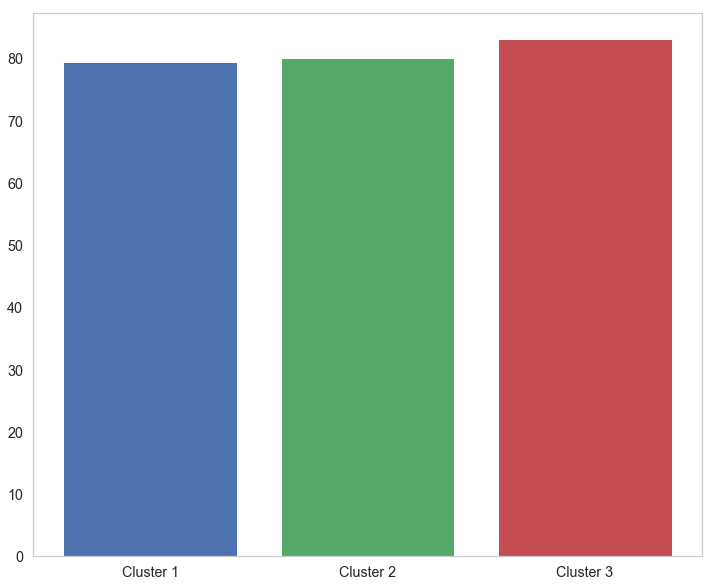

In [271]:
plt.bar(cl1,val, color=['b', 'g', 'r'])
  

In [241]:
plt.bar( wash2[['Cluster','Literacy']].groupby('Cluster').mean())

TypeError: bar() missing 1 required positional argument: 'height'

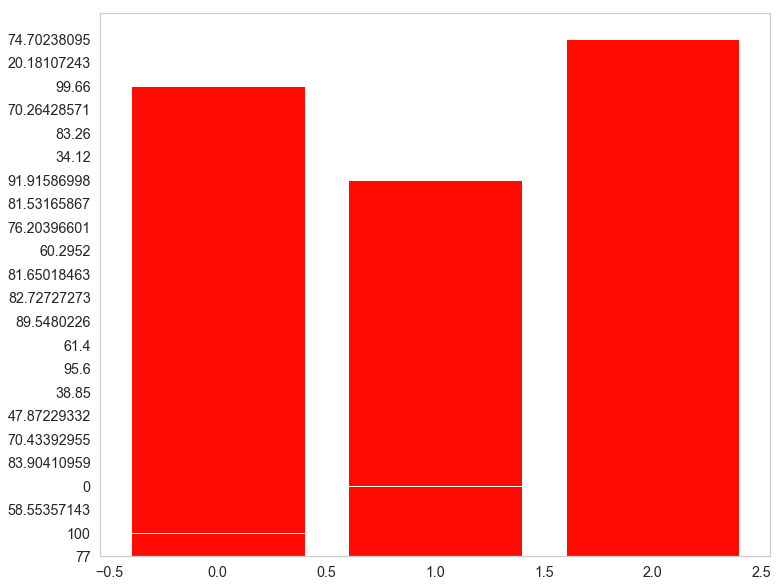

In [228]:
plt.bar(wash2['Cluster'], wash2['Sanitation'])
  
# Show graphic
plt.show()


In [177]:
col

array(['r', 'r', 'r', 'r', 'r', 'g', 'r', 'r', 'g', 'b', 'g', 'g', 'b',
       'r', 'r', 'g', 'r', 'r', 'b', 'g', 'r', 'r', 'r', 'r', 'b', 'r',
       'r', 'r', 'g', 'r', 'r', 'b', 'g', 'r', 'g', 'g', 'r', 'r', 'r',
       'r', 'r', 'g', 'g', 'b', 'b', 'r', 'b', 'b', 'r', 'g', 'b', 'g',
       'r', 'b', 'r', 'r', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'g', 'r',
       'r', 'b', 'b', 'r', 'r', 'g', 'r', 'r', 'r', 'b', 'r', 'b', 'r',
       'g', 'g', 'g', 'b', 'r', 'r', 'g', 'b', 'g', 'g'], dtype='<U32')

ValueError: 'c' argument has 88 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

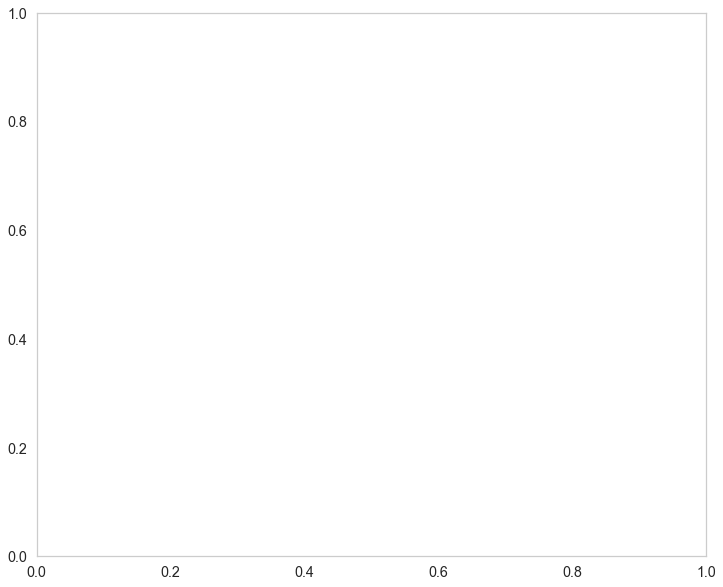

In [76]:
sns.scatterplot(wash['NWA_Basic water service'],wash['Hygine'],s=60, c=wash['Cluster'])
